In [35]:
import numpy as np
import matplotlib.pyplot as plt
from util import get_vehicle_data
import time
import pdb


In [36]:
class LogisticClassifier(object):
    def __init__(self, w_shape):
        """__init__

        :param w_shape: create w with shape w_shape using normal distribution
        """

        mean = 0
        std = 1
        self.w = np.random.normal(0, np.sqrt(2./np.sum(w_shape)), w_shape)

    def feed_forward(self, x):
        """feed_forward
        This function compute the output of your logistic classification model

        :param x: input

        :return result: feed forward result (after sigmoid) 
        """
        # [TODO 1.5]
        # Compute feedforward result
        z=x@self.w
        result = 1/(1+np.exp(-z))
        return result

    def compute_loss(self, y, y_hat):
        """compute_loss
        Compute the loss using y (label) and y_hat (predicted class)

        :param y:  the label, the actual class of the samples
        :param y_hat: the propabilitis that the given samples belong to class 1

        :return loss: a single value
        """
        # [TODO 1.6]
        # Compute loss value (a single number)
        a=np.nan_to_num(y*np.log(y_hat))
        b=np.nan_to_num((1-y)*np.log(1-y_hat))
        loss = a+b
        # print(loss.shape)
        return -1*np.mean(loss)

    def get_grad(self, x, y, y_hat):
        """get_grad
        Compute and return the gradient of w

        :param loss: computed loss between y_hat and y in the train dataset
        :param y_hat: predicted y

        :return w_grad: has the same shape as self.w
        """
        # [TODO 1.7]
        # Compute the gradient matrix of w, it has the same size of w
        w_grad = np.matmul(x.T,(y_hat-y))/y.shape[0]
        return w_grad

    def update_weight(self, grad, learning_rate):
        """update_weight
        Update w using the computed gradient

        :param grad: gradient computed from the loss
        :param learning_rate: float, learning rate
        """
        # [TODO 1.8]
        # Update w using SGD

        self.w += learning_rate*grad

    def update_weight_momentum(self, grad, learning_rate, momentum, momentum_rate):
        """update_weight with momentum
        Update w using the algorithm with momnetum

        :param grad: gradient computed from the loss
        :param learning_rate: float, learning rate
        :param momentum: the array storing momentum for training w, should have the same shape as w
        :param momentum_rate: float, how much momentum to reuse after each loop (denoted as gamma in the document)
        """
        # [TODO 1.9]
        # Update w using SGD with momentum
        momentum=momentum*momentum_rate+learning_rate*grad
        self.w-=momentum
        return momentum

In [37]:
def plot_loss(all_loss):
    plt.figure(1)
    plt.clf()
    plt.plot(all_loss)

NORMALIZE PER PIXEL
k image 64x64

In [38]:
def normalize_per_pixel(train_x, test_x):
    """normalize_per_pixel
    This function computes train mean and standard deviation on each pixel then applying data scaling on train_x and test_x using these computed values

    :param train_x: train images, shape=(num_train, image_height, image_width)
    :param test_x: test images, shape=(num_test, image_height, image_width)
    """
    # [TODO 1.1]
    # train_mean and train_std should have the shape of (1, image_height, image_width)
    # train_x = ...
    # test_x = ...
    mean_trainx=np.mean(train_x,axis=0)
    mean_testx=np.mean(test_x,axis=0)
    std_trainx=np.std(train_x,axis=0)
    std_testx=np.std(test_x,axis=0)
    std_trainx=std_trainx.reshape((1,std_trainx.shape[0],std_trainx.shape[1]))
    std_testnx=std_testx.reshape((1,std_testx.shape[0],std_testx.shape[1]))
    train_x = (train_x-mean_trainx)/std_trainx
    test_x = (test_x-mean_testx)/std_testx

    return train_x, test_x

NORMALIZE ALL PIXEL

In [39]:
def normalize_all_pixel(train_x, test_x):
    """normalize_all_pixel
    This function computes train mean and standard deviation on all pixels then applying data scaling on train_x and test_x using these computed values

    :param train_x: train images, shape=(num_train, image_height, image_width)
    :param test_x: test images, shape=(num_test, image_height, image_width)
    """
    # [TODO 1.2]
    # train_mean and train_std should have the shape of (1, image_height, image_width)
    meanx=np.mean(train_x)
    train_x = (train_x-meanx)/np.std(train_x)
    test_x = (test_x-meanx)/np.std(train_x)

    return train_x, test_x

RESHAPE 2D

In [40]:
def reshape2D(tensor):
    """reshape_2D
    Reshape our 3D tensors to 2D. A 3D tensor of shape (num_samples, image_height, image_width) must be reshaped into (num_samples, image_height*image_width)
    """
    # [TODO 1.3]
    tensor=tensor.reshape(tensor.shape[0],tensor.shape[1]*tensor.shape[2])

    return tensor

ADD ONE

In [41]:
def add_one(x):
    """add_one

    This function add ones as an additional feature for x
    :param x: input data
    """
    # [TODO 1.4]
    x=np.hstack((np.ones((x.shape[0],1)),x))

    return x

TEST


In [42]:
def test(y_hat, test_y):
    """test
    Compute precision, recall and F1-score based on predicted test values

    :param y_hat: predicted values, output of classifier.feed_forward
    :param test_y: test labels
    """

    # [TODO 1.10]
    # Compute test scores using test_y and y_hat
    #precision = TP/(TP+FP)
    a=np.round(y_hat)
    TP=np.sum((a==1)&(test_y==1))
    FP=np.sum((a==1)&(test_y==0))
    precision = TP/(TP+FP)
    #recall = TP/P
    recall = TP/y_hat.shape[0]

    f1 = 2*(precision*recall)/(precision+recall)
    print("Precision: %.3f" % precision)
    print("Recall: %.3f" % recall)
    print("F1-score: %.3f" % f1)

    return precision, recall, f1

generate unit testcase


In [43]:
def generate_unit_testcase(train_x, train_y):
    train_x = train_x[0:5, :, :]
    train_y = train_y[0:5, :]

    testcase = {}
    testcase['output'] = []

    # train_x_norm1, _ = normalize_per_pixel(train_x, train_x)
    train_x_norm2, _ = normalize_all_pixel(train_x, train_x)
    train_x = train_x_norm2

    testcase['train_x_norm1'] = train_x_norm1
    testcase['train_x_norm2'] = train_x_norm2

    train_x = reshape2D(train_x)
    testcase['train_x2D'] = train_x

    train_x = add_one(train_x)
    testcase['train_x1'] = train_x

    learning_rate = 0.001
    momentum_rate = 0.9

    for i in range(10):
        test_dict = {}
        classifier = LogisticClassifier((train_x.shape[1], 1))
        test_dict['w'] = classifier.w

        y_hat = classifier.feed_forward(train_x)
        loss = classifier.compute_loss(train_y, y_hat)
        grad = classifier.get_grad(train_x, train_y, y_hat)
        classifier.update_weight(grad, 0.001)
        test_dict['w_1'] = classifier.w

        momentum = np.ones_like(grad)
        classifier.update_weight_momentum(
            grad, learning_rate, momentum, momentum_rate)
        test_dict['w_2'] = classifier.w

        test_dict['y_hat'] = y_hat
        test_dict['loss'] = loss
        test_dict['grad'] = grad

        testcase['output'].append(test_dict)

    np.save('./data/unittest', testcase)

MAIN


Reading vehicle data...
EOF Reached
Done reading


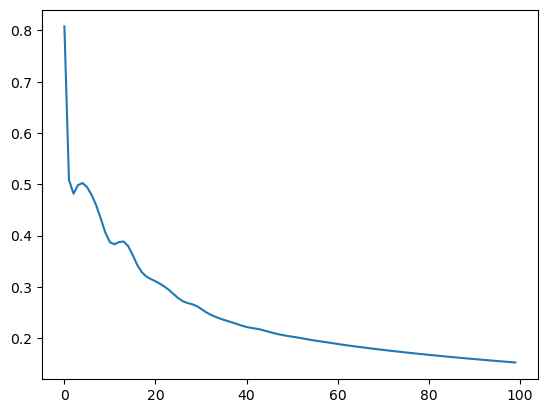

Epoch 100: loss is 0.15231


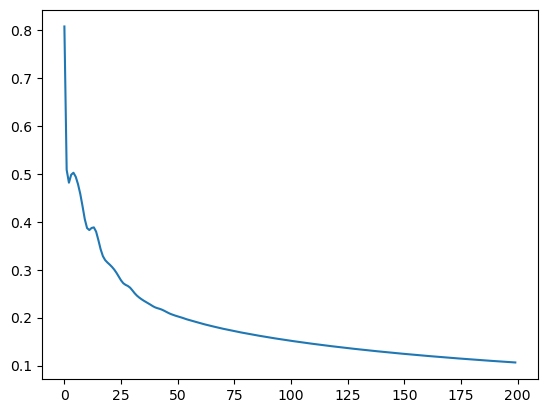

Epoch 200: loss is 0.10637


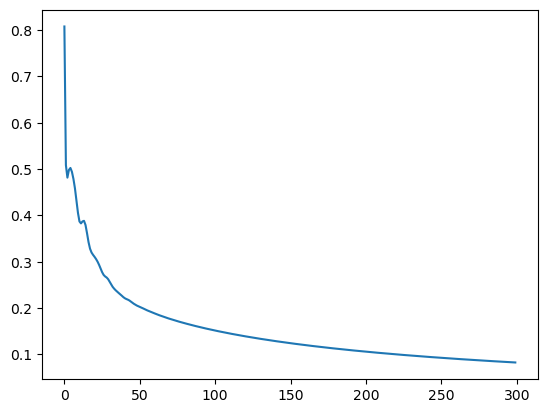

Epoch 300: loss is 0.08274


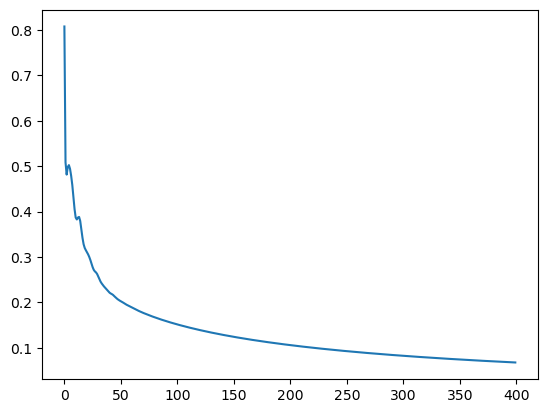

Epoch 400: loss is 0.06789


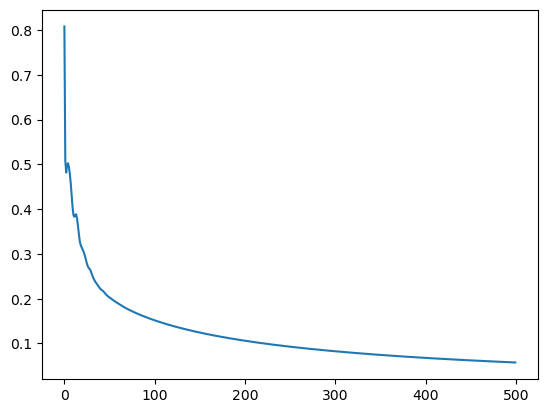

Epoch 500: loss is 0.05759


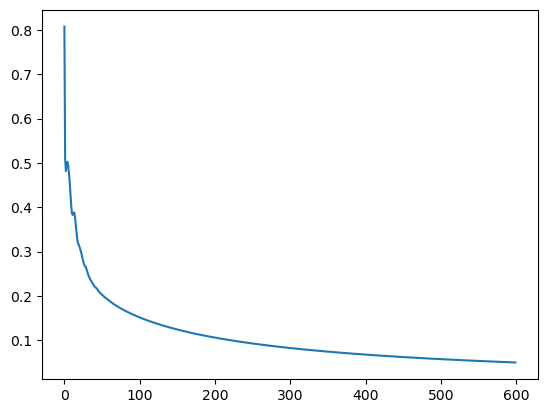

Epoch 600: loss is 0.05000


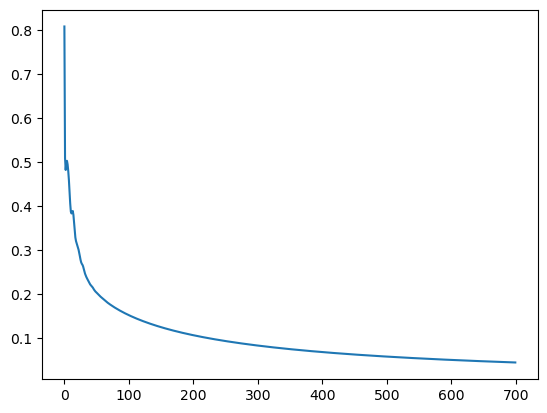

Epoch 700: loss is 0.04416


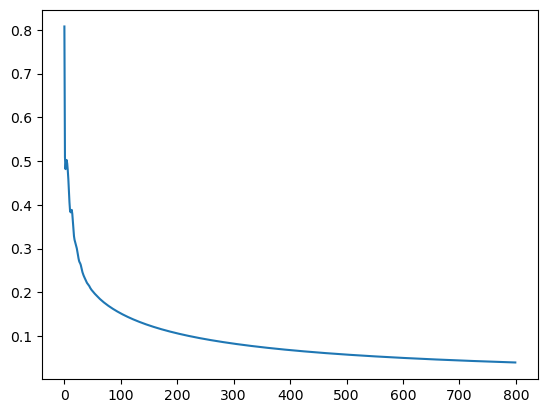

Epoch 800: loss is 0.03950


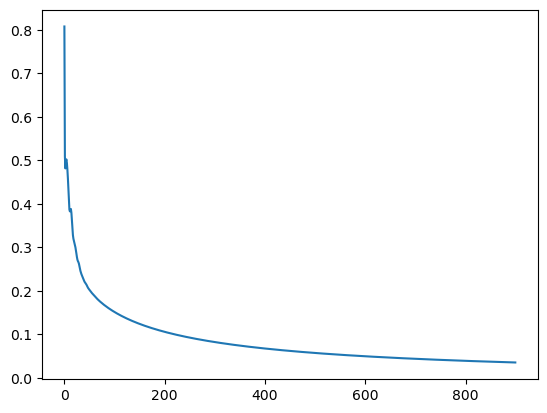

Epoch 900: loss is 0.03570


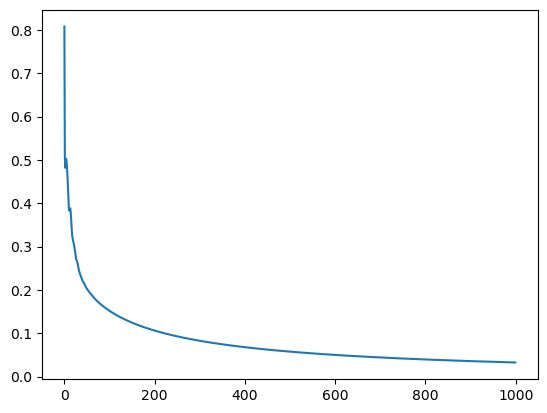

Epoch 1000: loss is 0.03253


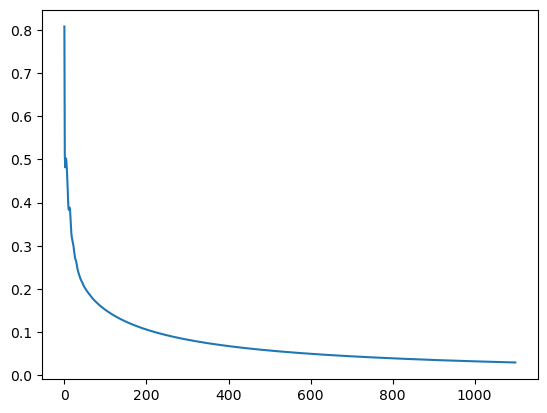

Epoch 1100: loss is 0.02985


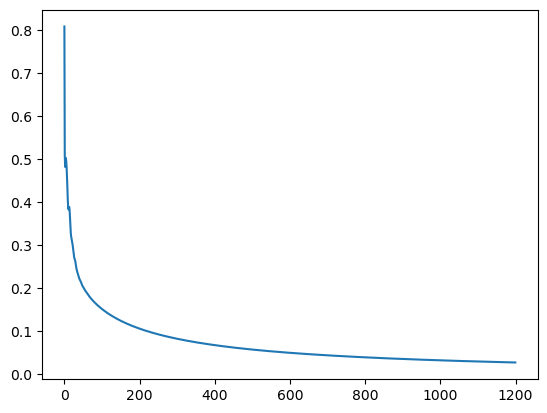

Epoch 1200: loss is 0.02754


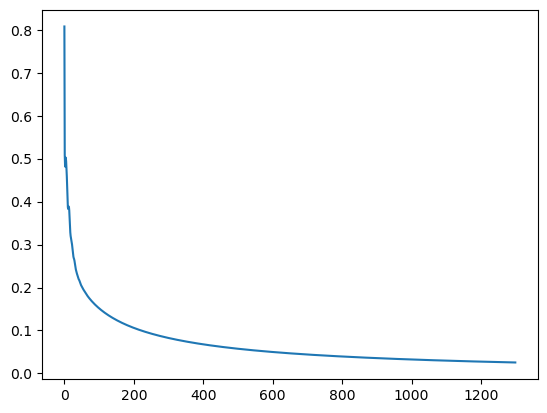

Epoch 1300: loss is 0.02555


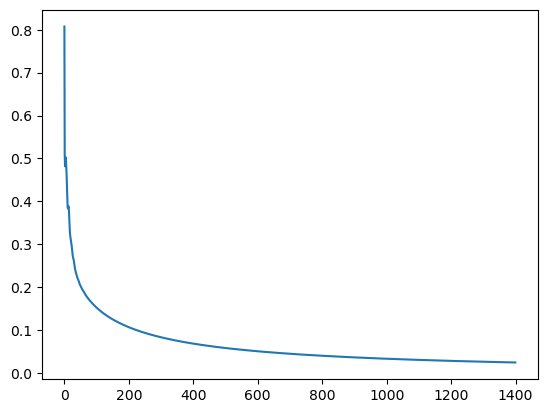

Epoch 1400: loss is 0.02381


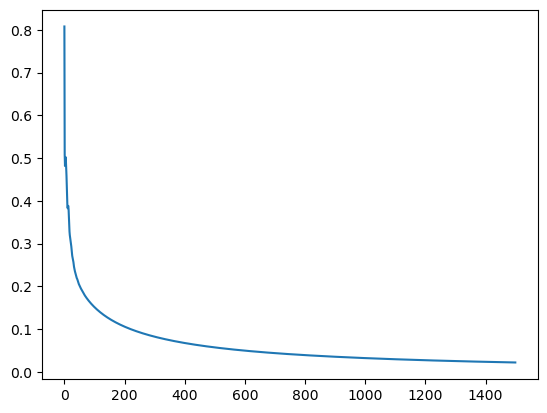

Epoch 1500: loss is 0.02228


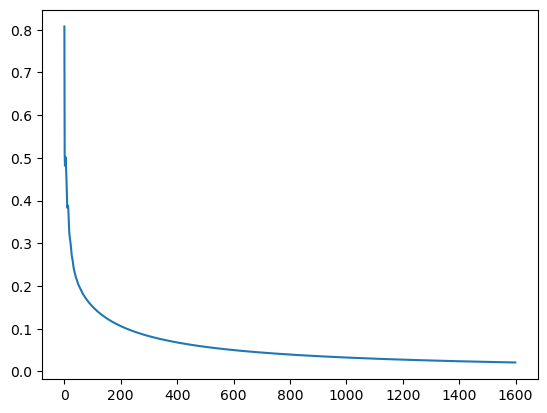

Epoch 1600: loss is 0.02092


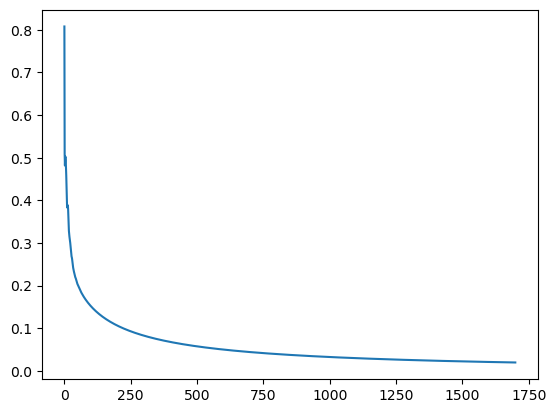

Epoch 1700: loss is 0.01972


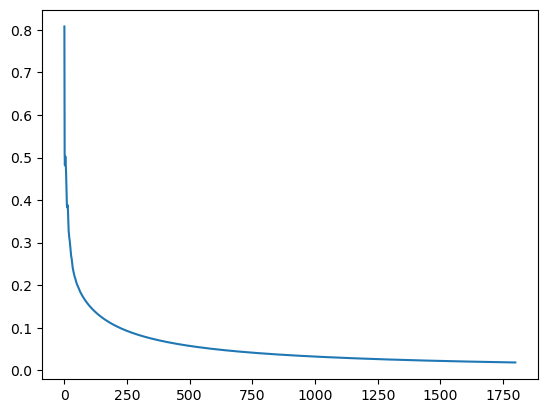

Epoch 1800: loss is 0.01864


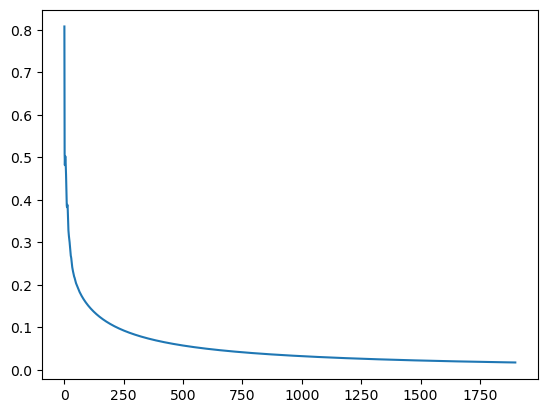

Epoch 1900: loss is 0.01767


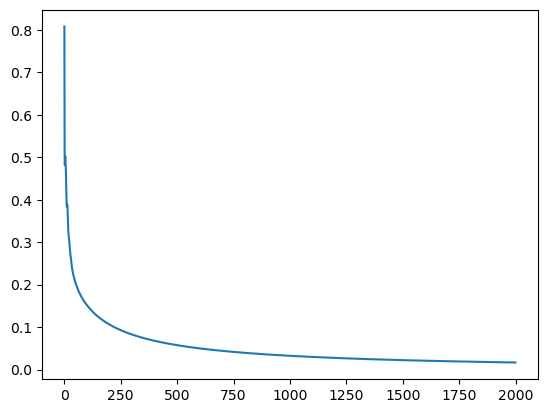

Epoch 2000: loss is 0.01680


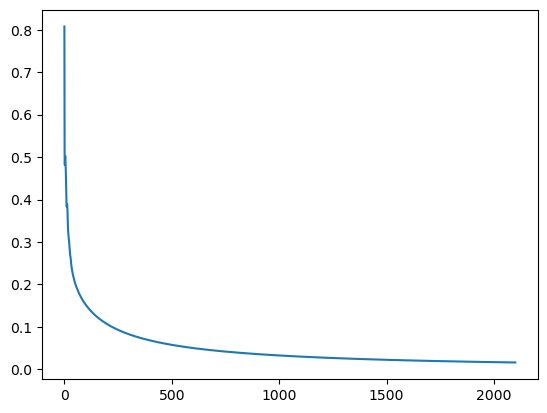

Epoch 2100: loss is 0.01600


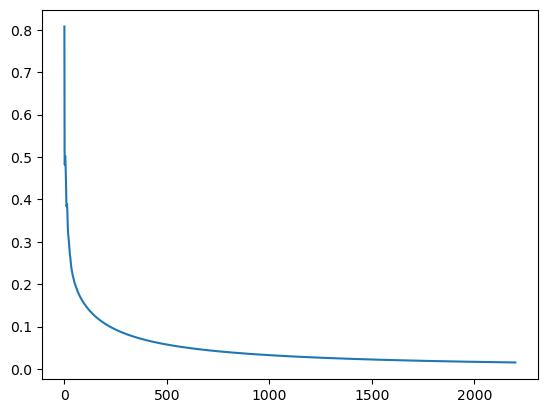

Epoch 2200: loss is 0.01528


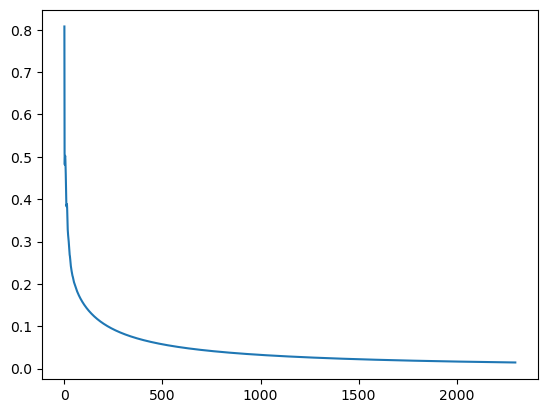

Epoch 2300: loss is 0.01461


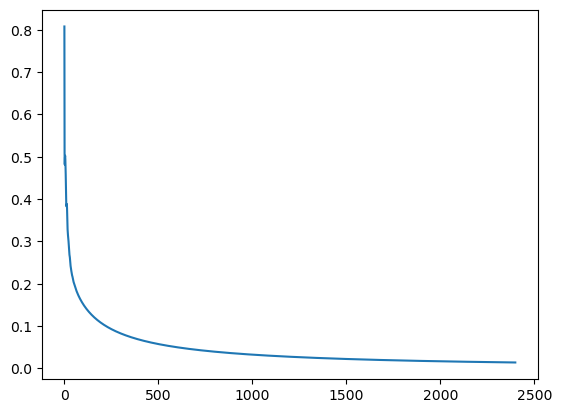

Epoch 2400: loss is 0.01400


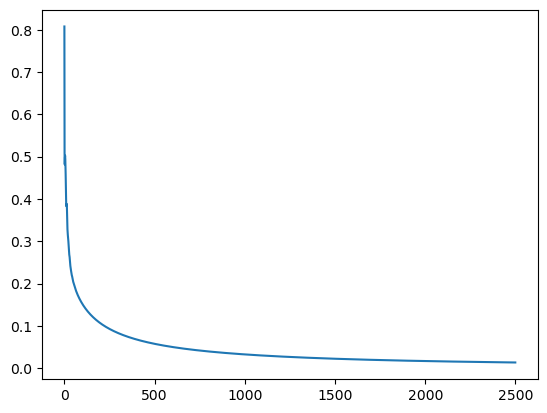

Epoch 2500: loss is 0.01344


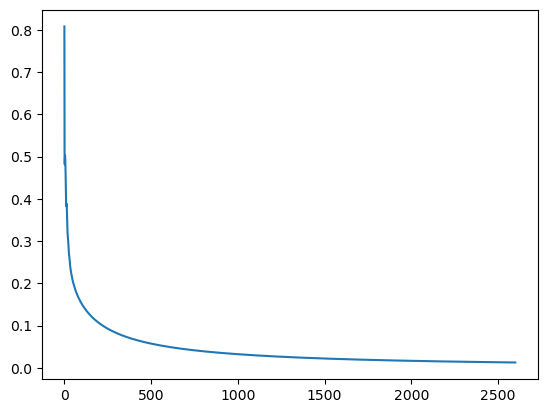

Epoch 2600: loss is 0.01292


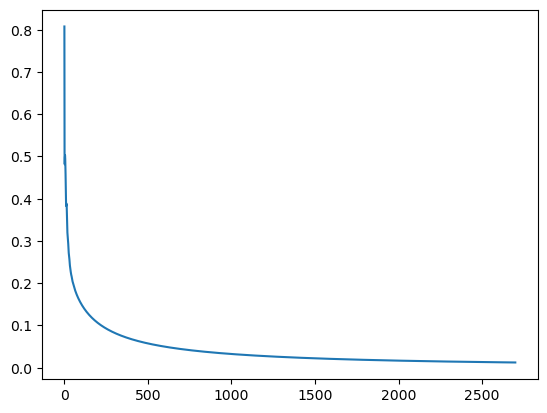

Epoch 2700: loss is 0.01244


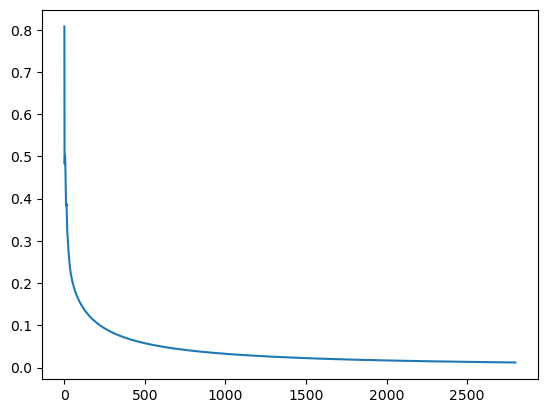

Epoch 2800: loss is 0.01200


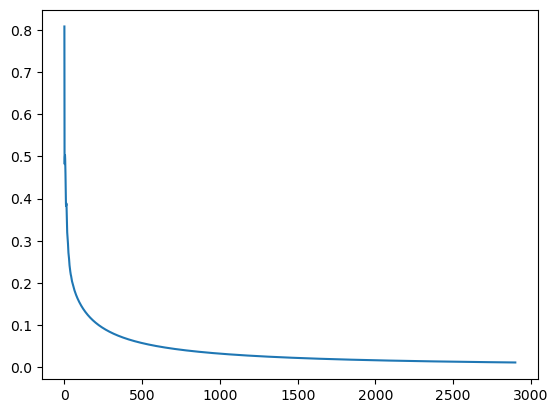

Epoch 2900: loss is 0.01158


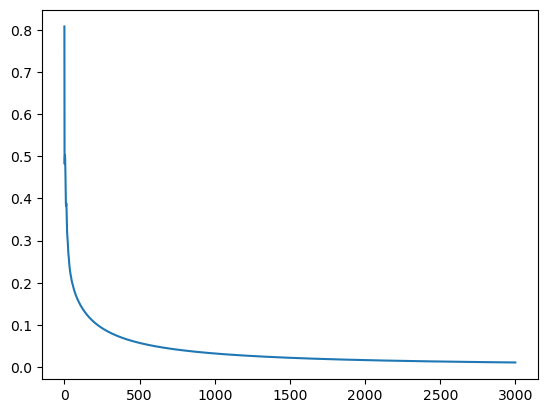

Epoch 3000: loss is 0.01119


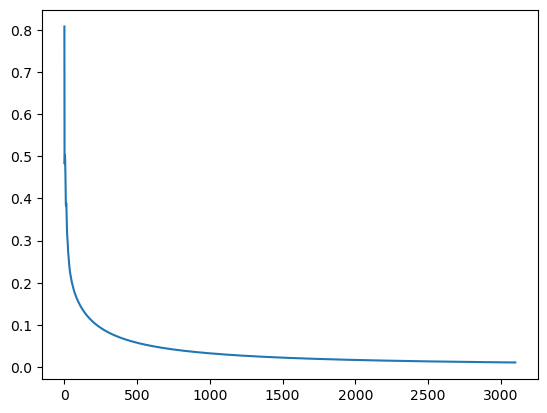

Epoch 3100: loss is 0.01083


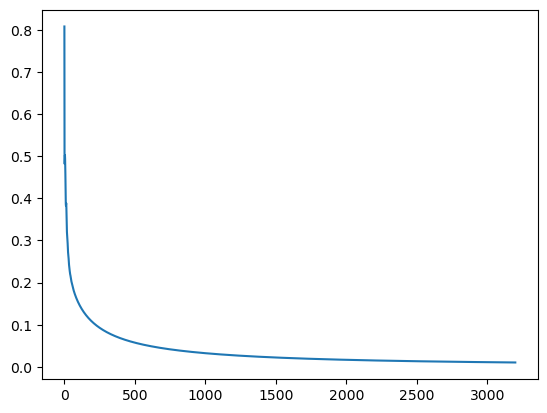

Epoch 3200: loss is 0.01048


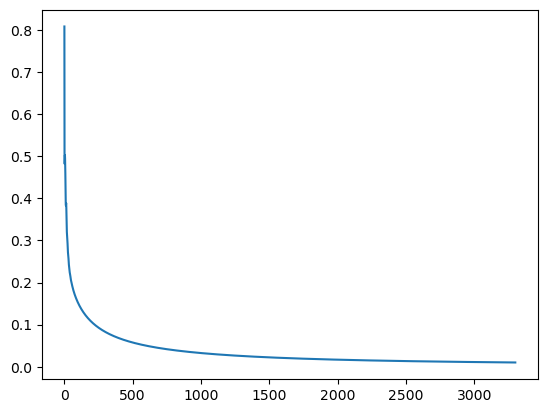

Epoch 3300: loss is 0.01016


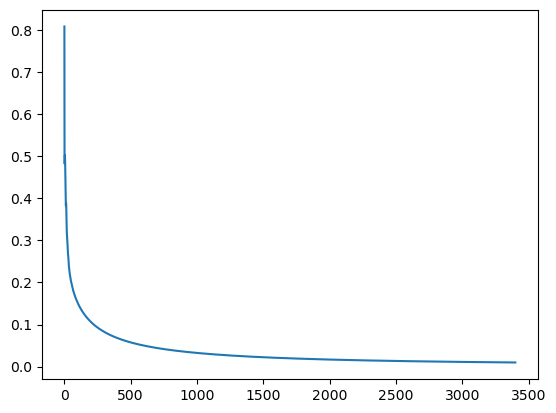

Epoch 3400: loss is 0.00986


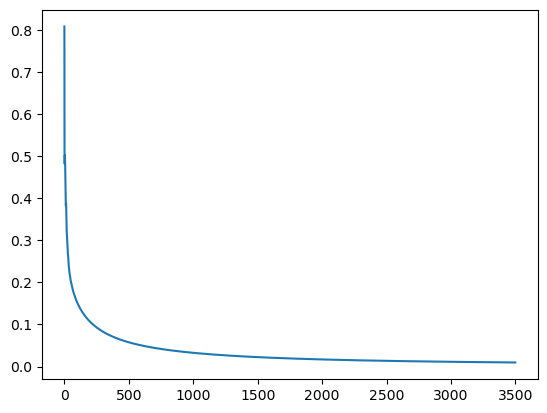

Epoch 3500: loss is 0.00958


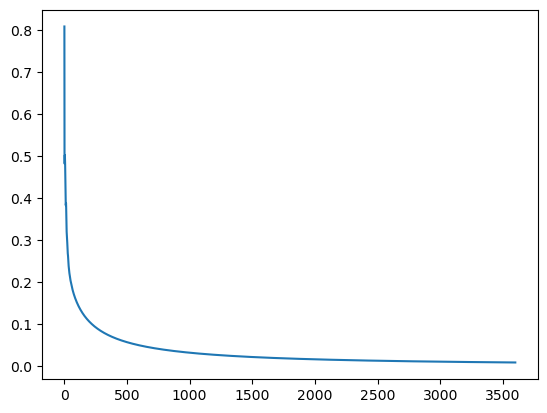

Epoch 3600: loss is 0.00931


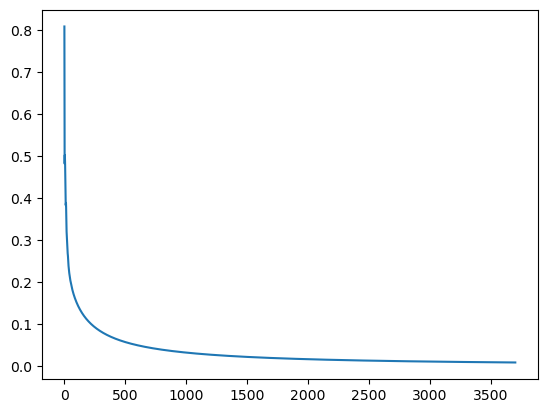

Epoch 3700: loss is 0.00905


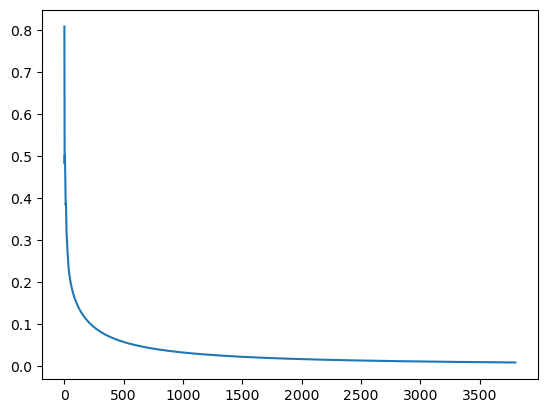

Epoch 3800: loss is 0.00881


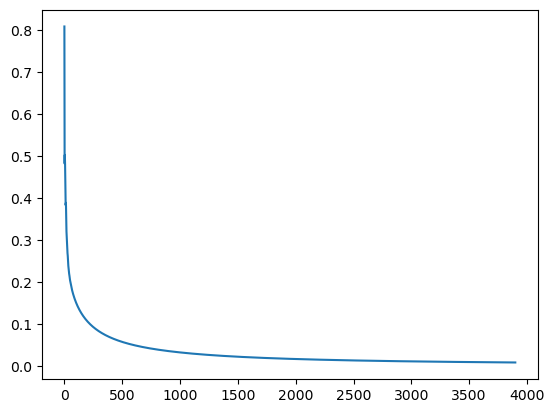

Epoch 3900: loss is 0.00858


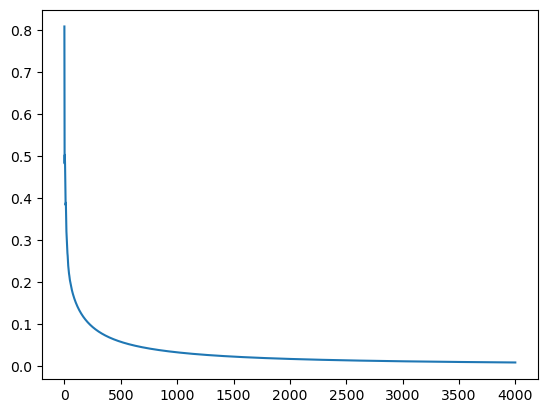

Epoch 4000: loss is 0.00837


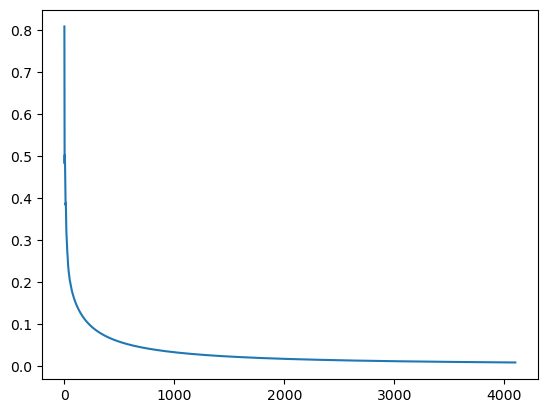

Epoch 4100: loss is 0.00816


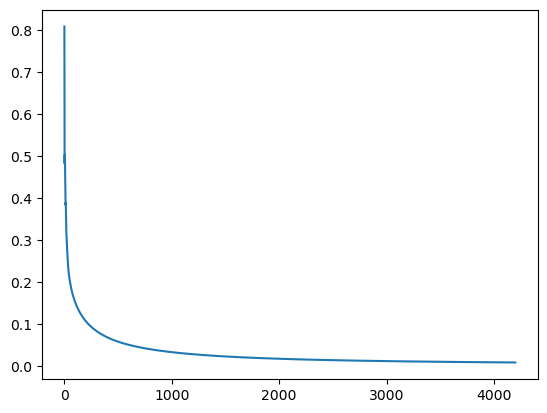

Epoch 4200: loss is 0.00796


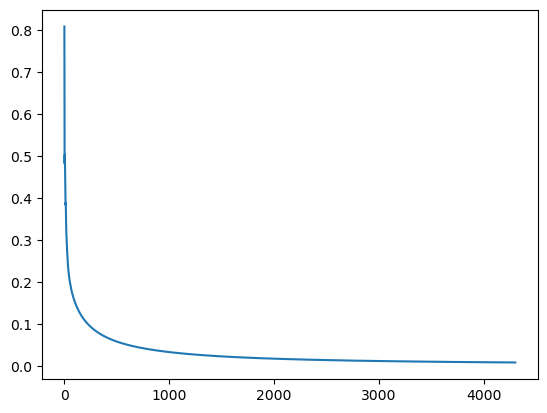

Epoch 4300: loss is 0.00777


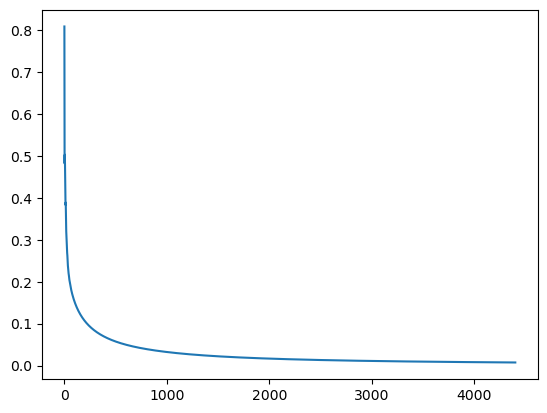

Epoch 4400: loss is 0.00760


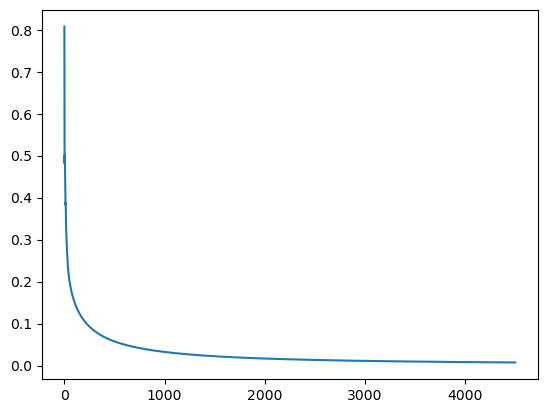

Epoch 4500: loss is 0.00742


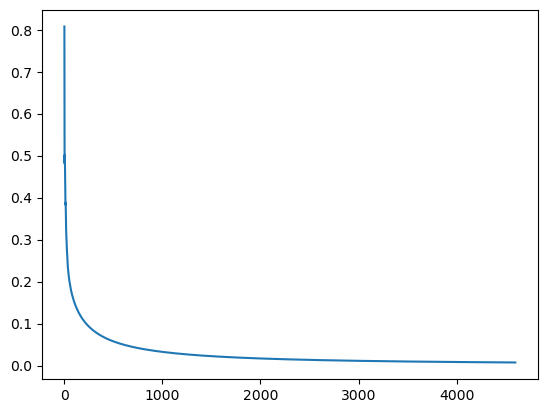

Epoch 4600: loss is 0.00726


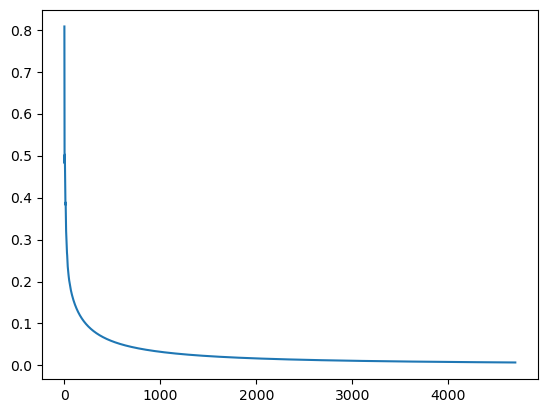

Epoch 4700: loss is 0.00710


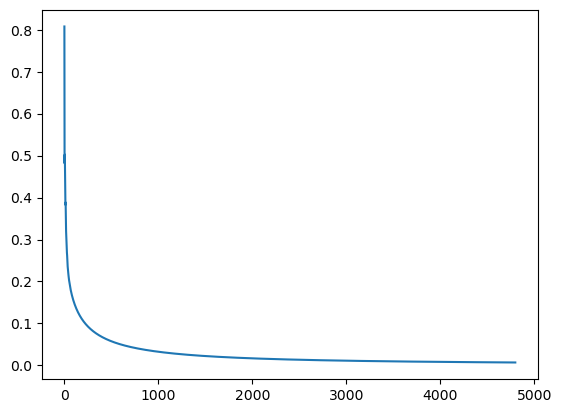

Epoch 4800: loss is 0.00695


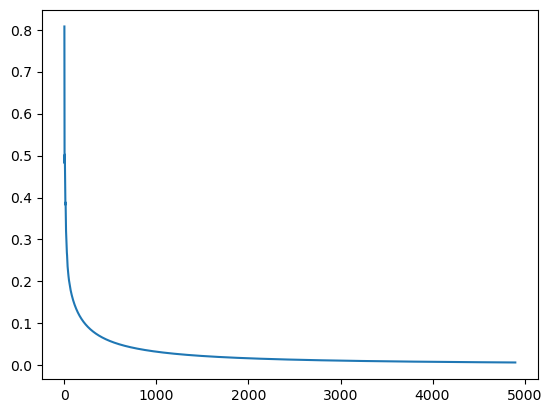

Epoch 4900: loss is 0.00681


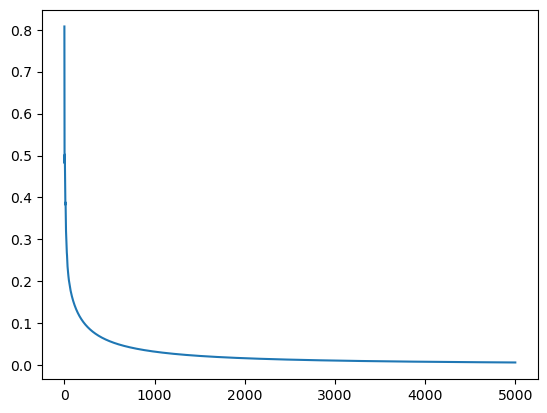

Epoch 5000: loss is 0.00667
Precision: 0.789
Recall: 0.300
F1-score: 0.435


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7948\1572558421.py:23: RuntimeWarning: overflow encountered in exp
  result = 1/(1+np.exp(-z))


In [44]:
if __name__ == "__main__":
    np.random.seed(2018)

    # Load data from file
    # Make sure that vehicles.dat is in data/
    train_x, train_y, test_x, test_y = get_vehicle_data()
    num_train = train_x.shape[0]
    num_test = test_x.shape[0]

    #generate_unit_testcase(train_x.copy(), train_y.copy())

    # Normalize our data: choose one of the two methods before training
    train_x, test_x = normalize_all_pixel(train_x, test_x)
    # train_x, test_x = normalize_per_pixel(train_x, test_x)

    # Reshape our data
    # train_x: shape=(2400, 64, 64) -> shape=(2400, 64*64)
    # test_x: shape=(600, 64, 64) -> shape=(600, 64*64)
    train_x = reshape2D(train_x)
    test_x = reshape2D(test_x)
    # Pad 1 as the last feature of train_x and test_x
    # Pad 1 as the last feature of train_x and test_x
    train_x = add_one(train_x)
    test_x = add_one(test_x)
    num_feature = train_x.shape[1]
    bin_classifier = LogisticClassifier((num_feature, 1))
    momentum = np.zeros_like(bin_classifier.w)
    # Define hyper-parameters and train-related parameters
    num_epoch = 5000
    learning_rate = 0.01
    momentum_rate = 0.9
    epochs_to_draw = 100
    all_loss = []
    plt.ion()
    for e in range(num_epoch):
        y_hat = bin_classifier.feed_forward(train_x)
        loss = bin_classifier.compute_loss(train_y, y_hat)
        grad = bin_classifier.get_grad(train_x, train_y, y_hat)

        # Updating weight: choose either normal SGD or SGD with momentum
        #bin_classifier.update_weight(grad, learning_rate)
        momentum=bin_classifier.update_weight_momentum(grad, learning_rate, momentum, momentum_rate)

        all_loss.append(loss)

        if (e % epochs_to_draw == epochs_to_draw-1):
            plot_loss(all_loss)
            plt.show()
            plt.pause(0.1)
            print("Epoch %d: loss is %.5f" % (e+1, loss))
        

    y_hat = bin_classifier.feed_forward(test_x)
    test(y_hat, test_y)
    